> ## **Bar charts**

### Allowed functions : ```import pandas as pd, import sqlite3```

In [29]:
import pandas as pd
import sqlite3

## анализировать только пользователей, а не администраторов
## размер шрифта и размер фигуры остаются прежними
## для каждого часа рассчитайте среднее количество коммитов в рабочие дни и выходные (если в течение часа коммитов не было, не используйте его для расчета среднего) используйте эти значения для своего графика, например: Пн, 17-18: 5 коммитов, Вт, 17-18: 6 коммитов, Ср, 17-18: 7 коммитов
## выберите палитру, которая вам действительно нравится, вам не обязательно копировать ее из графика выше
## в конце вашего Jupyter Notebook создайте ячейку markdown и вставьте вопрос
## «Отличается ли динамика в рабочие и выходные дни?» — для ответа включите час, когда количество фиксаций наибольшее в рабочие дни, и час, когда оно наибольшее в выходные.

In [45]:
conn=sqlite3.connect('../data/checking-logs.sqlite')
query='''
select uid, timestamp
from checker
where uid not like "admin%"
'''
df_checker=pd.read_sql(query,conn, parse_dates='timestamp')
df_checker['hour']=df_checker['timestamp'].dt.hour
df_checker['weekday']=df_checker['timestamp'].dt.weekday
df_checker['group_day']=pd.cut(df_checker['weekday'], bins=[-1,4,7],labels=['working_day','weekend'])
df_checker['day']=df_checker['timestamp'].dt.day
df_checker.head()


,uid,timestamp,hour,weekday,group_day,day
0,user_4,2020-04-17 05:19:02.744528,5,4,working_day,17
1,user_4,2020-04-17 05:22:35.249331,5,4,working_day,17
2,user_4,2020-04-17 05:22:45.549397,5,4,working_day,17
3,user_4,2020-04-17 05:34:14.691200,5,4,working_day,17
4,user_4,2020-04-17 05:34:24.422370,5,4,working_day,17


In [54]:
df=df_checker.groupby(['group_day','day','hour'],observed=True).count()
df.reset_index(inplace=True)
df=df[['group_day','hour','uid']]
df.head()

,group_day,hour,uid
0,working_day,6,1
1,working_day,11,7
2,working_day,13,2
3,working_day,18,23
4,working_day,19,16


In [64]:
df=df.groupby(['group_day','hour'],observed=True).mean('uid').reset_index()
df.rename(columns={'uid': 'mean_commit'}, inplace=True)
df

,group_day,hour,mean_commit
0,working_day,0,3.000000
1,working_day,3,2.000000
2,working_day,5,7.500000
3,working_day,6,1.500000
4,working_day,7,5.166667
5,working_day,8,3.700000
6,working_day,9,6.000000
7,working_day,10,13.200000
8,working_day,11,6.769231
9,working_day,12,7.181818


In [65]:
df_working = df[df['group_day'] == 'working_day']
df_weekend = df[df['group_day'] == 'weekend']

<Axes: title={'center': 'Working_day'}, xlabel='hour'>

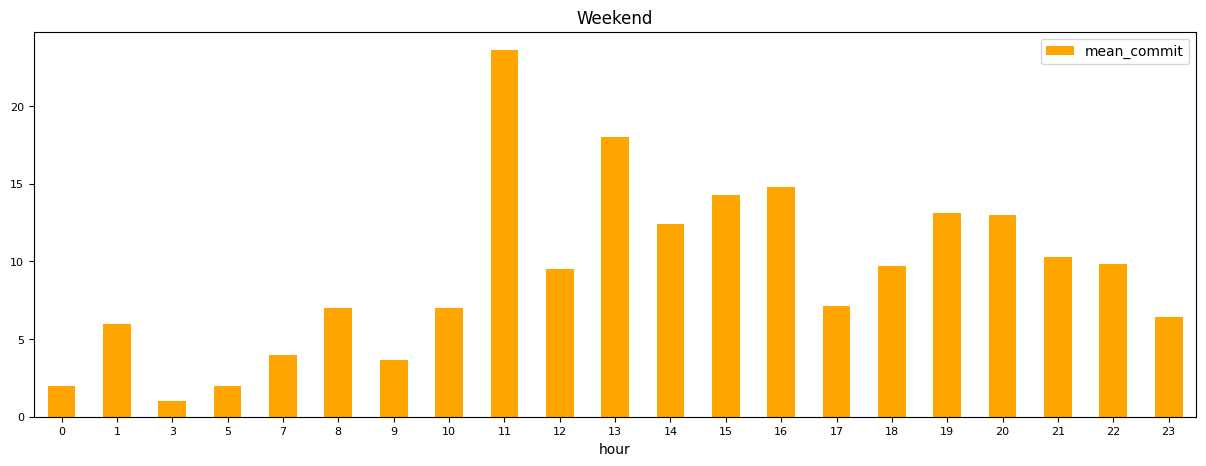

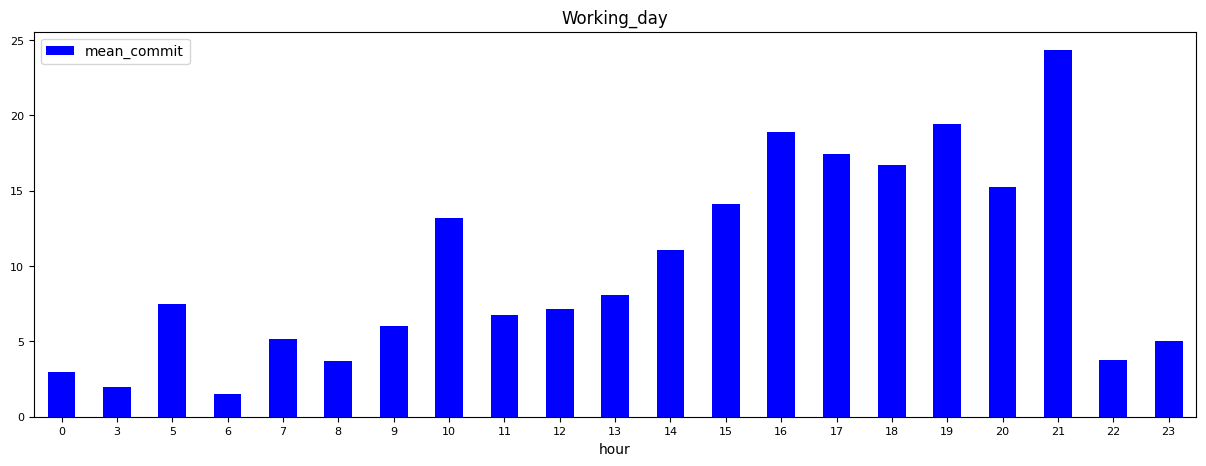

In [ ]:
df_weekend.plot(
    x='hour',
    y='mean_commit',
    kind='bar',
    fontsize=8,
    figsize=(15, 5),
    legend=True,
    title='Weekend',
    rot=0,
    color='orange'
)


df_working.plot(
    x='hour',
    y='mean_commit',
    kind='bar',
    fontsize=8,
    figsize=(15, 5),
    legend=True,
    title='Working_day',
    rot=0,
    color='blue'
)



## «Отличается ли динамика в рабочие и выходные дни?» — для ответа включите час, когда количество фиксаций наибольшее в рабочие дни, и час, когда оно наибольшее в выходные.

In [87]:
print(f'''
Working_day = {df_working.loc[df_working['mean_commit'].idxmax(), 'hour']}
Weekend_day = {df_weekend.loc[df_weekend['mean_commit'].idxmax(), 'hour']}
             ''')


Working_day = 21
Weekend_day = 11
             


In [88]:
conn.close()